# Cluster Analysis: Lexico-grammatical style (S. 5.2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import heapq

from numpy.typing import NDArray
from typing import Callable, Collection, Union

from sklearn.preprocessing import Normalizer, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier

from ruzicka.test_metrics import nini, minmax, cosine

In [2]:
%load_ext rpy2.ipython

In [3]:
vecs = pd.read_csv("elegy_corpus.csv", index_col=0)

In [4]:
vecs

Author        Work          Poem  LEN  \
0       Ovid         Ep.         Ep. 1  116   
1       Ovid         Ep.         Ep. 2  148   
2       Ovid         Ep.         Ep. 3  154   
3       Ovid         Ep.         Ep. 4  176   
4       Ovid         Ep.         Ep. 5  158   
..       ...         ...           ...  ...   
282  ps-Ovid  Consolatio  Consolatio 3  158   
283  ps-Ovid        Ibis        Ibis 1   64   
284  ps-Ovid        Ibis        Ibis 2  200   
285  ps-Ovid        Ibis        Ibis 3  200   
286  ps-Ovid        Ibis        Ibis 4  178   

                                                 Chunk  
0    hank tua penelope lento tibi mittit ulikse\nni...  
1    hospita demopoon tua te rodopeia pyllis\nultra...  
2    kwam legis a rapta briseide littera wenit\nwik...  
3    kwam nisi tu dederis karitura_st ipsa salutem\...  
4    perlegis an konjunks prohibet nowa perlege non...  
..                                                 ...  
282  kwo raperis laniata komas similiskwe furenti\n...  
283  tempus ad hok lustris bis jam mihi kwinkwe per...  
284  di maris et terrae kwi_kwis meliora tenetis\ni...  
285  kwi_kwokulis karuit per kwos male widerat auru...  
286  aut te dewoweat kertis abdera diebus\nsaksakwe...  

[287 rows x 5 columns]

In [5]:
corpus = vecs[vecs.LEN >= 20]

In [6]:
from sklearn.decomposition import TruncatedSVD

vectorizer = make_pipeline(
    TfidfVectorizer(
        sublinear_tf=True, use_idf=False, norm="l2", analyzer="char", ngram_range=(2, 4)
    ),
    FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
    StandardScaler(),
    TruncatedSVD(50, random_state=42),
    Normalizer(),
)

In [7]:
X = pd.DataFrame(vectorizer.fit_transform(corpus.Chunk))
y = list(corpus.Poem)

/Users/ben/venv/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ben/venv/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [58]:
X

0         1         2         3         4         5         6   \
0    0.161065 -0.001026 -0.052309  0.004261 -0.072446  0.002033  0.023901   
1    0.278876 -0.038205 -0.038915  0.026329 -0.098426  0.036191  0.068141   
2    0.280049 -0.034775 -0.033127  0.039672 -0.080829  0.035864  0.063807   
3    0.261044 -0.013166 -0.032469 -0.015887 -0.128212 -0.006198  0.082470   
4    0.313018  0.005502 -0.033947 -0.032762 -0.134325 -0.006314  0.081460   
..        ...       ...       ...       ...       ...       ...       ...   
274  0.206204  0.040639 -0.025891 -0.104988 -0.062835  0.044709 -0.112414   
275  0.026478 -0.181892  0.103351  0.183782  0.057049  0.062953 -0.060916   
276  0.255535  0.031917 -0.076802  0.036817 -0.074677  0.016110  0.000703   
277  0.263262  0.066766 -0.218202  0.294190  0.086270  0.017921  0.668113   
278  0.269824  0.062848 -0.349320  0.739948  0.333464 -0.043052 -0.274146   

           7         8         9   ...        40        41        42  \
0   -0.021315  0.104129  0.019973  ...  0.342937  0.114572 -0.235808   
1   -0.064746  0.022820  0.027495  ... -0.092582 -0.002447  0.408037   
2   -0.029343  0.112981 -0.041228  ... -0.375180 -0.299831  0.027361   
3   -0.086393  0.077803 -0.054418  ...  0.160590 -0.088013 -0.182449   
4   -0.084322  0.156879  0.043602  ...  0.104930  0.014832  0.360029   
..        ...       ...       ...  ...       ...       ...       ...   
274  0.090744 -0.443479  0.028650  ... -0.032518 -0.007699 -0.019513   
275  0.145174 -0.024624  0.050660  ... -0.189895 -0.029175 -0.380505   
276  0.063221 -0.248739 -0.189936  ...  0.059188  0.040314  0.011332   
277  0.539214  0.048015 -0.064040  ... -0.001161  0.017135 -0.019524   
278 -0.233092 -0.021619 -0.026581  ...  0.013270  0.003257  0.000988   

           43        44        45        46        47        48        49  
0    0.234613 -0.159218  0.019080  0.025229 -0.057132  0.130457 -0.030212  
1    0.305489  0.094085  0.198505  0.115938  0.227269  0.069577 -0.220230  
2   -0.231504  0.128670 -0.080132 -0.108791  0.066648  0.143135  0.062549  
3    0.109418 -0.072625 -0.007442  0.083117  0.095867  0.028050  0.011616  
4   -0.052840  0.045586  0.145274 -0.142619 -0.030220  0.085228  0.595649  
..        ...       ...       ...       ...       ...       ...       ...  
274 -0.008593 -0.005319 -0.078350 -0.017060  0.004710 -0.026125 -0.017727  
275  0.198571  0.120599  0.101523 -0.554951 -0.232496  0.099788 -0.016836  
276  0.023273  0.032853 -0.008387 -0.062851  0.005724  0.001159 -0.007452  
277 -0.013346  0.031950 -0.007788  0.012089  0.007972 -0.003661 -0.013014  
278 -0.009528 -0.002858  0.004682  0.008712 -0.001127  0.004544 -0.001391  

[279 rows x 50 columns]

In [8]:
def eder_bct(
    X: Collection[Collection[float]],
    y: Collection[str],
    n: int = 500,
    keep_pct: float = 0.2,
    feats_pct: float = 0.3,
    rng: np.random.Generator = np.random.default_rng(),
    metric: Union[
        Callable[[Collection[float], Collection[float]], float], str
    ] = "cosine",
) -> pd.DataFrame:
    dfs = []
    cl = KNeighborsClassifier(n_neighbors=3, metric=metric)
    for _ in range(n):
        # Sample feats_pct random features (columns)
        this_X = X.sample(int(X.shape[1] * feats_pct), axis=1, random_state=rng)

        # Calculate kNN in that space
        cl.fit(this_X, y)
        dists, indices = cl.kneighbors(n_neighbors=3)

        # And build a dataframe from the results
        dicts = []
        for i, node_ary in enumerate(indices):
            for j, node in enumerate(node_ary):
                dicts.append(
                    {
                        "from": y[i],
                        "to": y[node],
                        # neighbors are sorted low distance to high
                        # so this gives us the 'inverse rank' ie lowest
                        # distance of n neighbors scores n, next is n-1 etc
                        # this is consistent with the stylo BCT algorithm
                        "weight": (len(node_ary) - j),
                    }
                )
        dfs.append(pd.DataFrame(dicts))

    # Now aggregate the dataframes, summing the weights for
    # identical (directed) edges
    graph = pd.concat(dfs).groupby(["from", "to"], as_index=False).agg(sum)
    graph_trim = graph.nlargest(int(len(graph) * keep_pct), "weight")
    return graph_trim

In [56]:
graph_trim = eder_bct(X, y, n=5000, rng=np.random.default_rng(seed=42), metric="cosine")


In [72]:
graph_trim[graph_trim["from"] == "Ep. 7"].head(10)

from            to  weight
15944  Ep. 7    Prop. 3 20    1826
15913  Ep. 7     Prop. 1 8    1568
15996  Ep. 7       Tr. 3 3    1400
15853  Ep. 7        Ep. 21     899
15969  Ep. 7      Tib. 1 4     822
15858  Ep. 7         Ep. 8     757
15905  Ep. 7    Prop. 1 19     752
15837  Ep. 7  Consolatio 1     713
15840  Ep. 7         Ep. 1     699
15855  Ep. 7         Ep. 4     674

In [66]:
%%R

source('do_bct.R')

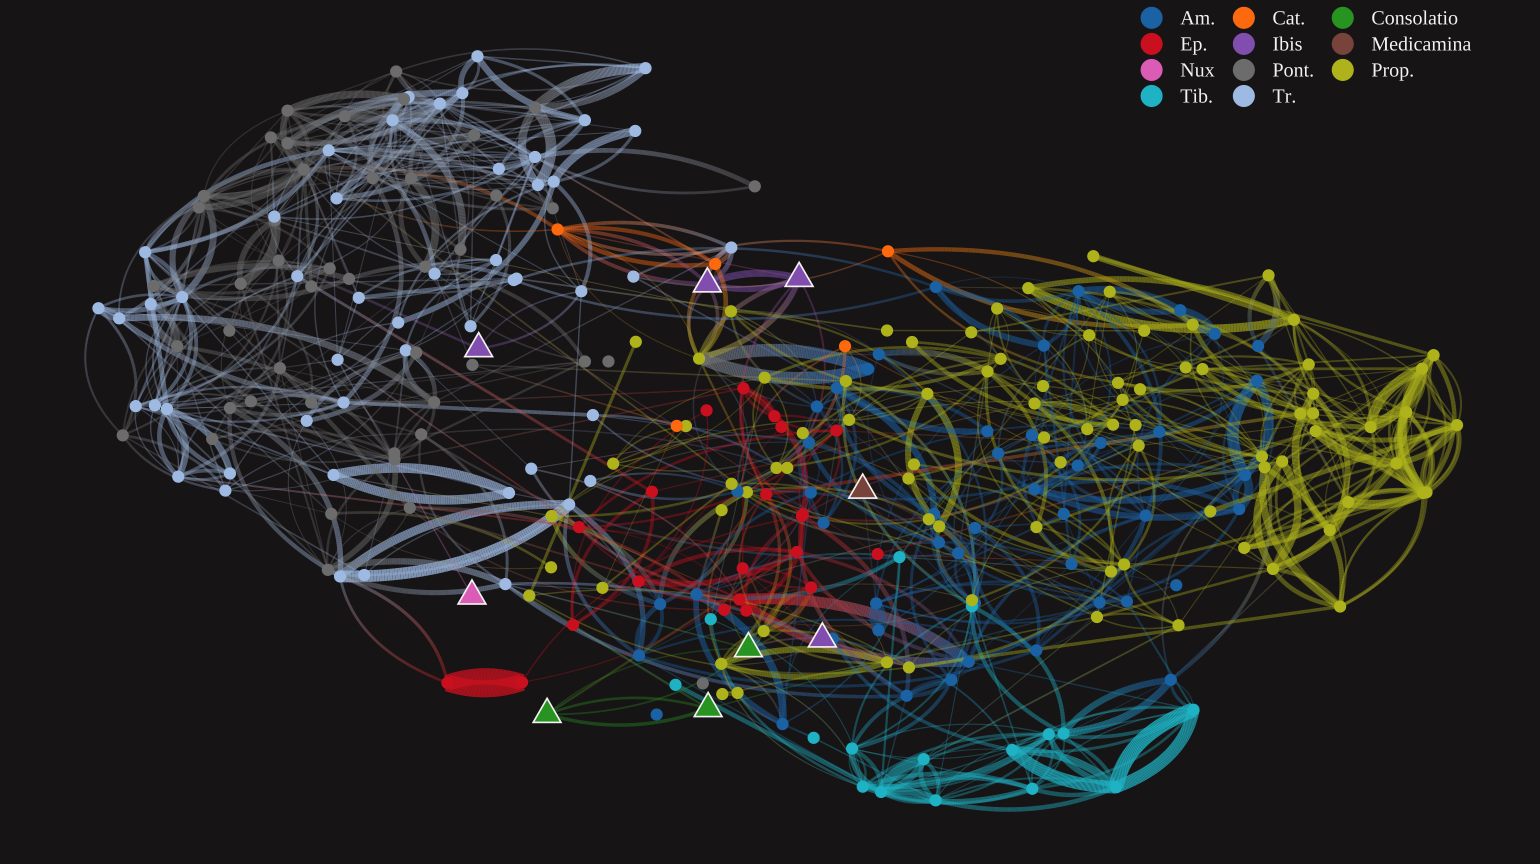

In [69]:
%%R -i graph_trim  -h 6 -w 10.7 -u in -r 144
do_bct(graph_trim, '#f6f5f5','#1e1a1d', 1400)


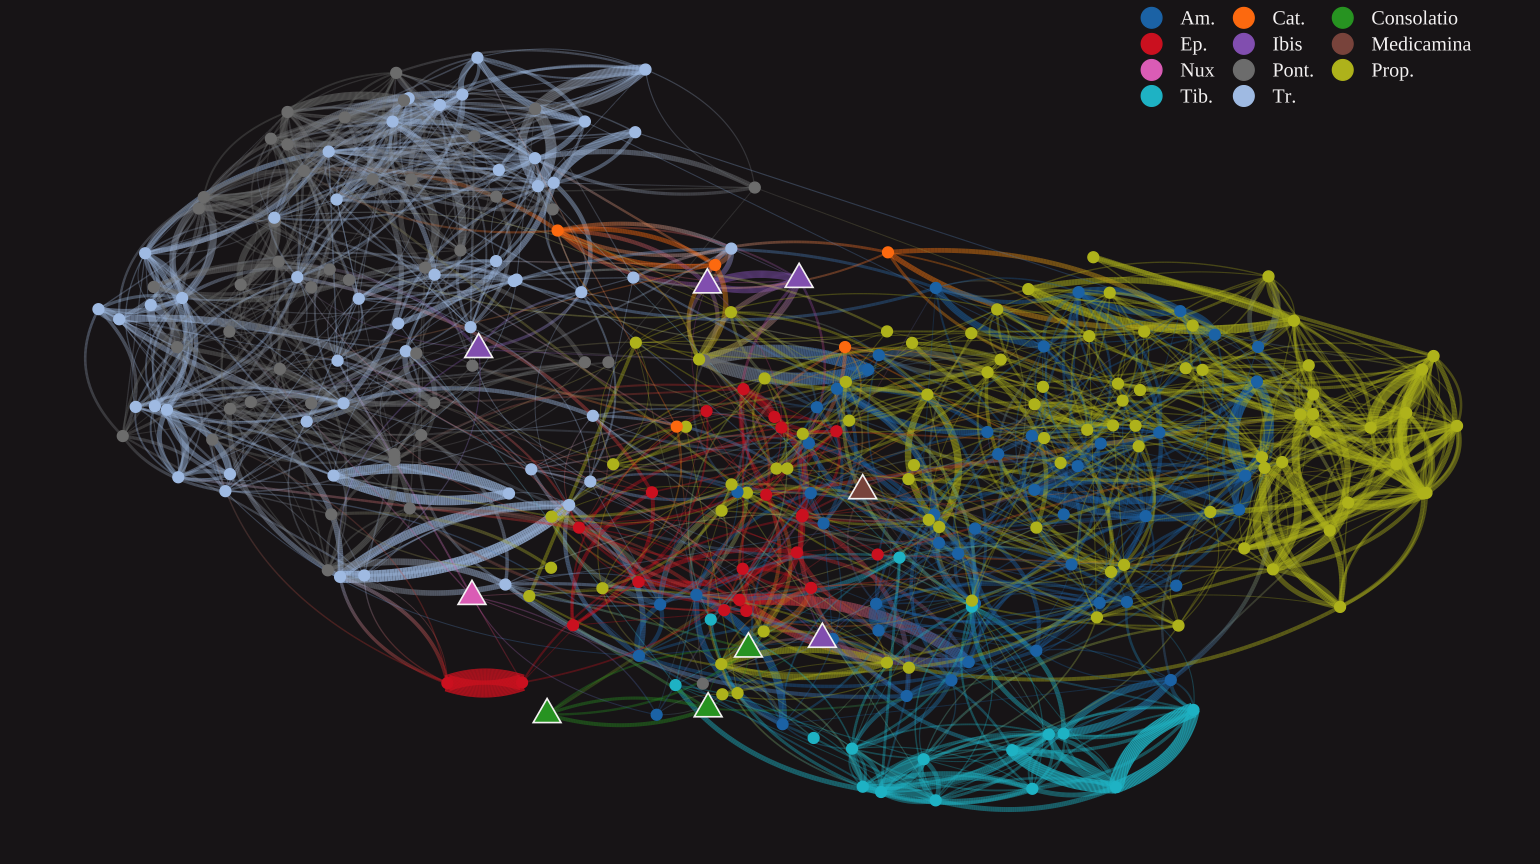

In [ ]:
%%R -i graph_trim  -h 6 -w 10.7 -u in -r 144

# other libraries only need to be loaded once
library(dplyr)
library(ggraph)
library(tidygraph)
library(showtext)
library(ggsci)
library(stringr)
library(paletteer)
font_add_google("Tinos", "fnt")
#font_add_google("IM Fell DW Pica", "fnt")

showtext_auto()

pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "grey50", "#A65628")
bgcol <- '#1e1a1d'
fgcol <- '#f6f5f5'
# bgcol = '#f4f0e8'
# fgcol = '#040300'
# Seed for the layout
set.seed(42)
gr1 <- as_tbl_graph(graph_trim)
# Plot
gr1 %>%
    # Add a node attribute called 'work' which is the poem name with
    # no numbers eg Pont. 3 4 -> Pont.
    activate(nodes) %>%
    mutate(work = str_replace_all(name, '\\s[0-9]+', '')) %>%
    # Layout with Fruchtermann Reingold
    ggraph(layout = 'fr') + 
    # fan2 does curved lines when nodes are linked in both directions
    # and also lets you interpolate colour along the edge
    geom_edge_fan2(
        aes(
            # Aesthetically filter out noisy minor edges.
            # This magic param is determined by experimentation
            # and depends on the number of samples etc.
            # Slightly hacky, but doesn't affect graph layout,
            # just makes the visualisation cleaner.
            filter=weight>=1000,
            width=weight,
            color=node.work,
            alpha=weight
        ),
        strength=2,
        show.legend=FALSE
    ) +
    # Normal nodes
    geom_node_point(size = 2.2, aes(color = work), alpha=1) +
    # Special nodes
    geom_node_point(
        aes(
            filter=work %in% c('Nux','Ibis','Consolatio','Medicamina')
        ),
        size=5,
        shape=17,
        color=fgcol,
        show.legend=FALSE
    ) +
    geom_node_point(
        aes(
            filter=work %in% c('Nux','Ibis','Consolatio','Medicamina'),
            color=work
        ),
        size=4,
        shape=17,
        show.legend=FALSE
    ) +
    # geom_node_text(
    #     size = 2,
    #     family="fnt",
    #     aes(filter=work %in% c('Nux','Ibis','Consolatio','Medicamina', 'Ep.'),label=str_extract(name,'\\d+')),
    # ) +

    scale_fill_paletteer_d('ggsci::category20_d3') +
    scale_colour_paletteer_d('ggsci::category20_d3') +
    scale_edge_color_manual(values=pal_d3("category20")(20)) +
    scale_edge_width(range=c(0.2,4)) +
    scale_edge_alpha(range=c(0.3,1)) +
    #coord_flip() +
    guides(color=guide_legend(ncol=3,byrow=TRUE, override.aes = aes(size=4.5))) +

    theme_minimal() +
    theme(
        #plot.title = element_text(margin = margin(b = 50)),
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol,color=bgcol),
        legend.title=element_blank(),
        legend.position=c(0.85,0.94),
        #legend.position= 'None',
        legend.text=element_text(size=10,color=fgcol),
        legend.spacing.x = unit(2, 'mm'),
        legend.spacing.y = unit(-1.5, 'mm'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text = element_text(family="fnt"),
        panel.grid.minor=element_blank(), 
        panel.grid.major=element_blank()
    )

# fn <- "bct_ngram.pdf"
# ggsave(fn, dpi=600, width=10.7, height=6, device=cairo_pdf)


In [11]:
nini_vec = make_pipeline(
    TfidfVectorizer(
        sublinear_tf=True,
        use_idf=False,
        norm="l2",
        analyzer="char",
        ngram_range=(5, 5),
        max_features=5000,
    ),
    FunctionTransformer(lambda x: np.array(x.todense()), accept_sparse=True),
    # Never centre the data for use with minmax distance!
    # StandardScaler(with_mean=False),
)
X_nini = pd.DataFrame(nini_vec.fit_transform(corpus.Chunk))

In [39]:
graph_nini = eder_bct(
    X_nini, y, n=5000, rng=np.random.default_rng(seed=42), metric=nini
)

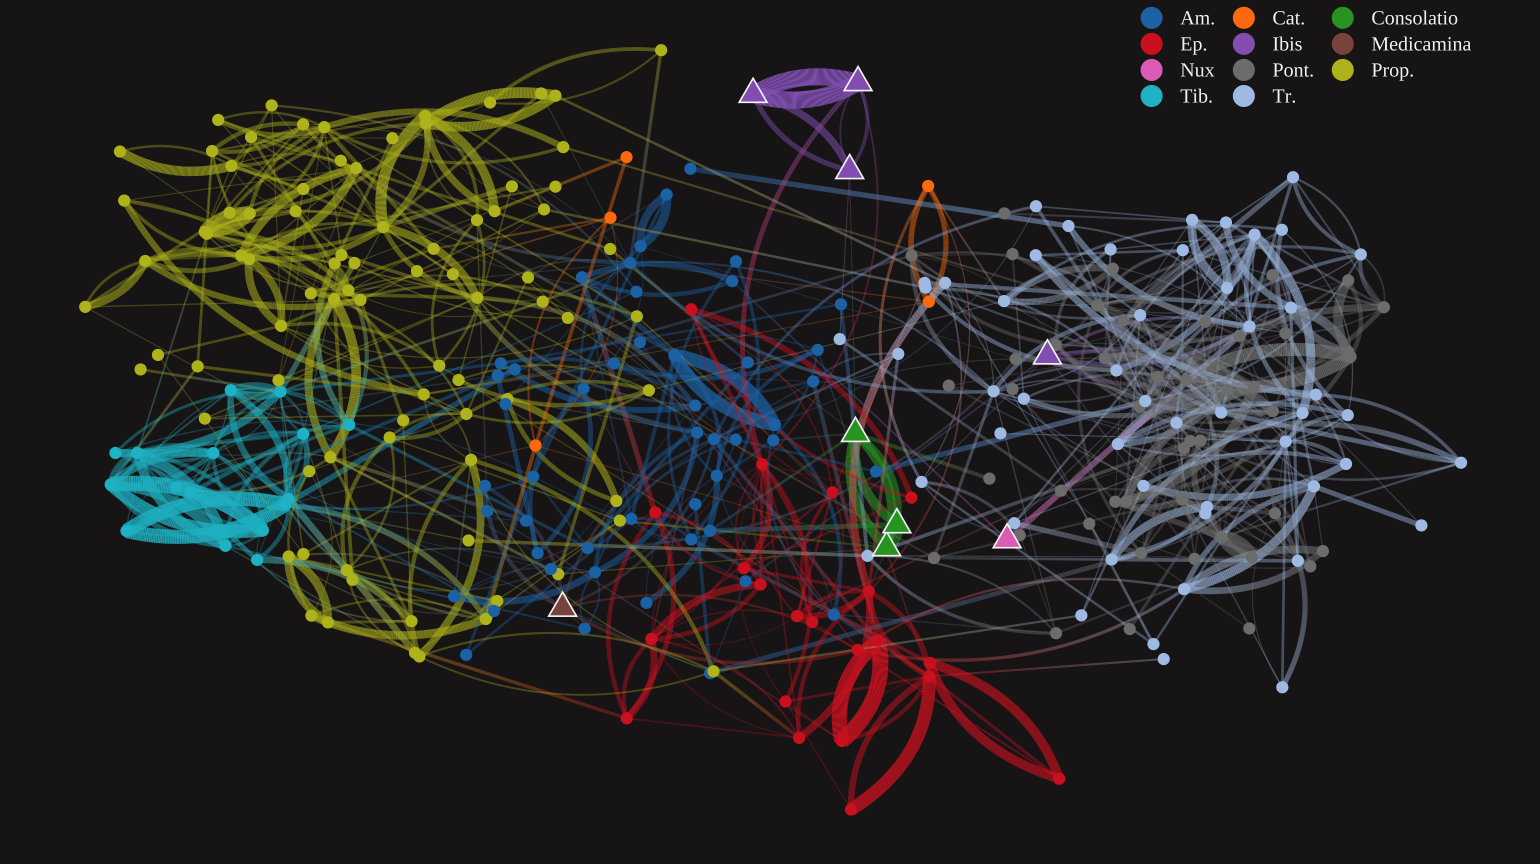

In [62]:
%%R -i graph_nini  -h 6 -w 10.7 -u in -r 144
bgcol <- '#1e1a1d'
fgcol <- '#f6f5f5'
do_bct(graph_nini, fgcol, bgcol)

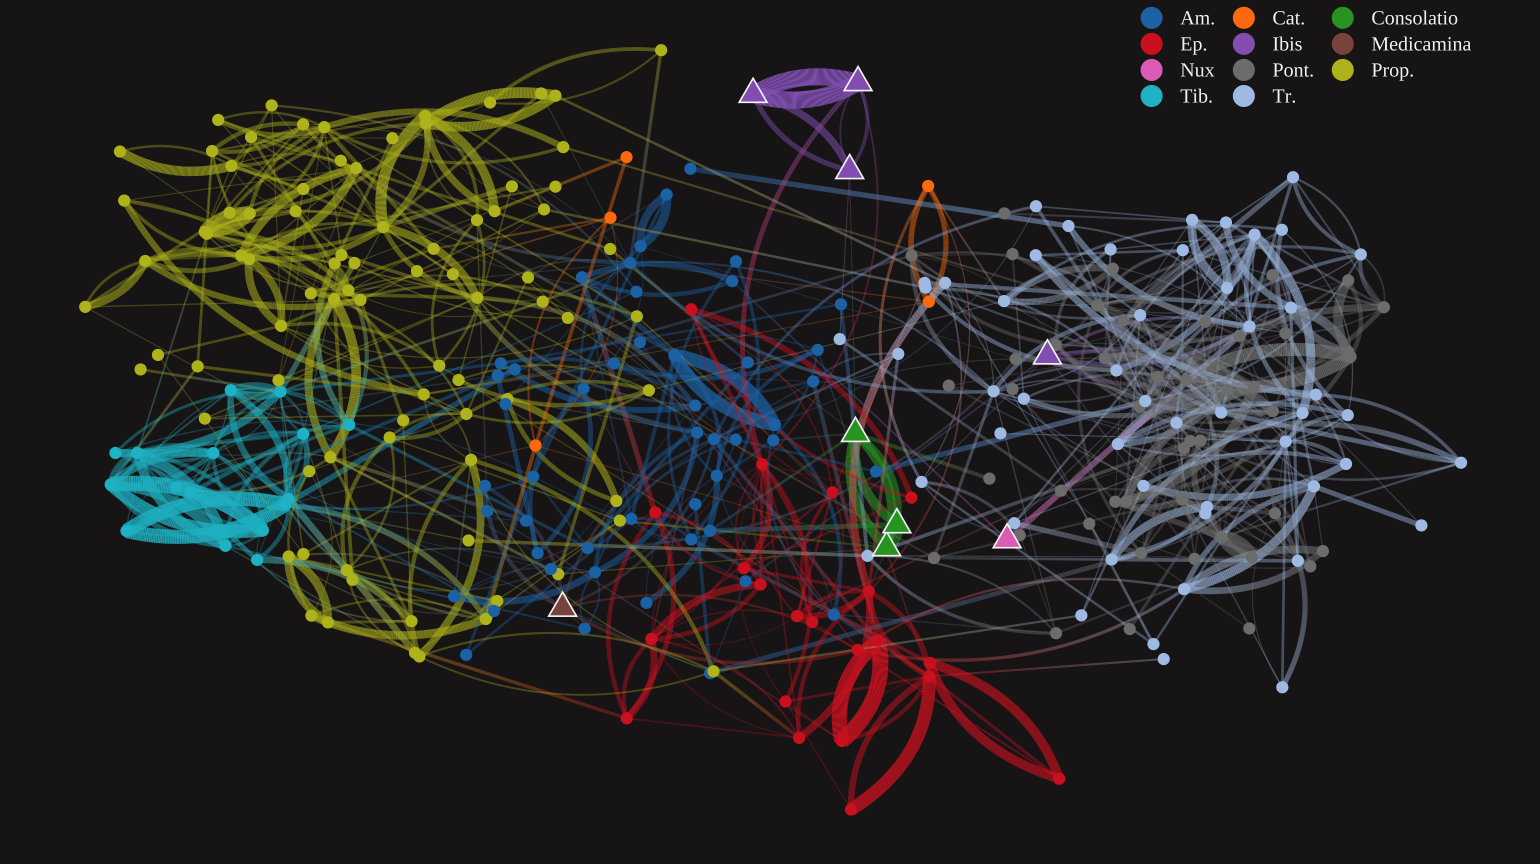

In [53]:
%%R -i graph_nini  -h 6 -w 10.7 -u in -r 144


# other libraries only need to be loaded once
library(dplyr)
library(ggraph)
library(tidygraph)
library(showtext)
library(ggsci)
library(stringr)
library(paletteer)
font_add_google("Tinos", "fnt")
#font_add_google("IM Fell DW Pica", "fnt")

showtext_auto()

pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "grey50", "#A65628")
bgcol <- '#1e1a1d'
fgcol <- '#f6f5f5'
# bgcol = '#f4f0e8'
# fgcol = '#040300'
# Seed for the layout
set.seed(42)
gr1 <- as_tbl_graph(graph_nini)
# Plot
gr1 %>%
    # Add a node attribute called 'work' which is the poem name with
    # no numbers eg Pont. 3 4 -> Pont.
    activate(nodes) %>%
    mutate(work = str_replace_all(name, '\\s[0-9]+', '')) %>%
    # Layout with Fruchtermann Reingold
    ggraph(layout = 'fr') + 
    # fan2 does curved lines when nodes are linked in both directions
    # and also lets you interpolate colour along the edge
    geom_edge_fan2(
        aes(
            # Aesthetically filter out noisy minor edges.
            # This magic param is determined by experimentation
            # and depends on the number of samples etc.
            # Slightly hacky, but doesn't affect graph layout,
            # just makes the visualisation cleaner.
            filter=weight>=2100,
            width=weight,
            color=node.work,
            alpha=weight
        ),
        strength=2,
        show.legend=FALSE
    ) +
    # Normal nodes
    geom_node_point(size = 2.2, aes(color = work), alpha=1) +
    # Special nodes
    geom_node_point(
        aes(
            filter=work %in% c('Nux','Ibis','Consolatio','Medicamina')
        ),
        size=5,
        shape=17,
        color=fgcol,
        show.legend=FALSE
    ) +
    geom_node_point(
        aes(
            filter=work %in% c('Nux','Ibis','Consolatio','Medicamina'),
            color=work
        ),
        size=4,
        shape=17,
        show.legend=FALSE
    ) +
    # geom_node_text(
    #     size = 2,
    #     family="fnt",
    #     aes(filter=work %in% c('Nux','Ibis','Consolatio','Medicamina', 'Ep.'),label=str_extract(name,'\\d+')),
    # ) +

    scale_fill_paletteer_d('ggsci::category20_d3') +
    scale_colour_paletteer_d('ggsci::category20_d3') +
    scale_edge_color_manual(values=pal_d3("category20")(20)) +
    scale_edge_width(range=c(0.2,4)) +
    scale_edge_alpha(range=c(0.3,1)) +
    #coord_flip() +
    guides(color=guide_legend(ncol=3,byrow=TRUE, override.aes = aes(size=4.5))) +

    theme_minimal() +
    theme(
        #plot.title = element_text(margin = margin(b = 50)),
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol,color=bgcol),
        legend.title=element_blank(),
        legend.position=c(0.85,0.94),
        #legend.position= 'None',
        legend.text=element_text(size=10,color=fgcol),
        legend.spacing.x = unit(2, 'mm'),
        legend.spacing.y = unit(-1.5, 'mm'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text = element_text(family="fnt"),
        panel.grid.minor=element_blank(), 
        panel.grid.major=element_blank()
    )

# fn <- "bct_ngram.pdf"
# ggsave(fn, dpi=600, width=10.7, height=6, device=cairo_pdf)


In [46]:
graph_nini_small = eder_bct(
    X_nini, y, n=500, rng=np.random.default_rng(seed=42), metric=nini
)

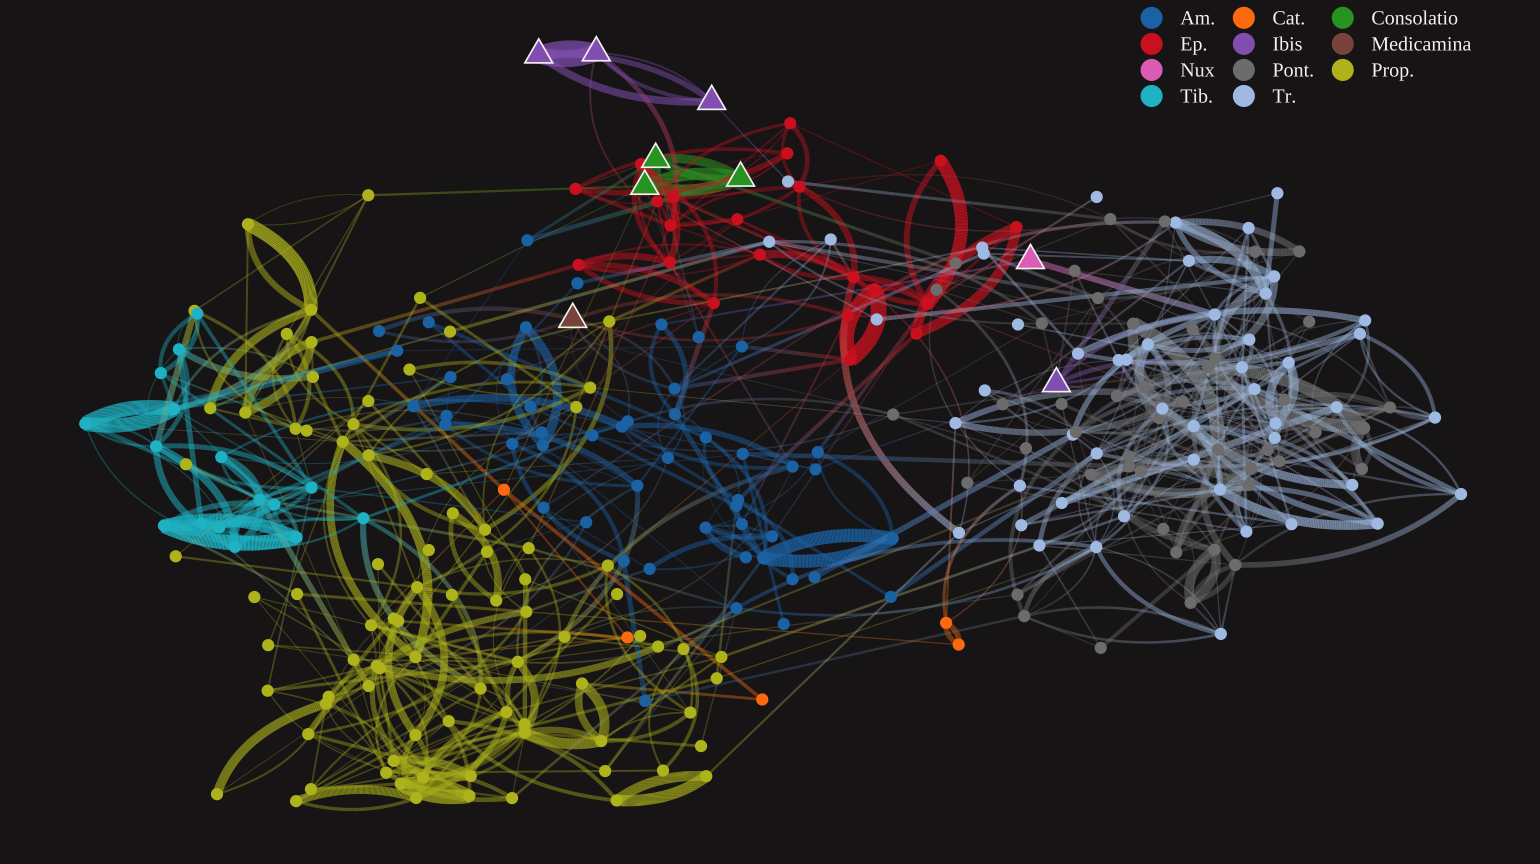

In [54]:
%%R -i graph_nini_small  -h 6 -w 10.7 -u in -r 144

# other libraries only need to be loaded once
library(dplyr)
library(ggraph)
library(tidygraph)
library(showtext)
library(ggsci)
library(stringr)
library(paletteer)
font_add_google("Tinos", "fnt")
#font_add_google("IM Fell DW Pica", "fnt")

showtext_auto()

pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "grey50", "#A65628")
bgcol <- '#1e1a1d'
fgcol <- '#f6f5f5'
# bgcol = '#f4f0e8'
# fgcol = '#040300'
# Seed for the layout
set.seed(42)
gr1 <- as_tbl_graph(graph_nini_small)
# Plot
gr1 %>%
    # Add a node attribute called 'work' which is the poem name with
    # no numbers eg Pont. 3 4 -> Pont.
    activate(nodes) %>%
    mutate(work = str_replace_all(name, '\\s[0-9]+', '')) %>%
    # Layout with Fruchtermann Reingold
    ggraph(layout = 'fr') + 
    # fan2 does curved lines when nodes are linked in both directions
    # and also lets you interpolate colour along the edge
    geom_edge_fan2(
        aes(
            # Aesthetically filter out noisy minor edges.
            # This magic param is determined by experimentation
            # and depends on the number of samples etc.
            # Slightly hacky, but doesn't affect graph layout,
            # just makes the visualisation cleaner.
            filter=weight>=210,
            width=weight,
            color=node.work,
            alpha=weight
        ),
        strength=2,
        show.legend=FALSE
    ) +
    # Normal nodes
    geom_node_point(size = 2.2, aes(color = work), alpha=1) +
    # Special nodes
    geom_node_point(
        aes(
            filter=work %in% c('Nux','Ibis','Consolatio','Medicamina')
        ),
        size=5,
        shape=17,
        color=fgcol,
        show.legend=FALSE
    ) +
    geom_node_point(
        aes(
            filter=work %in% c('Nux','Ibis','Consolatio','Medicamina'),
            color=work
        ),
        size=4,
        shape=17,
        show.legend=FALSE
    ) +
    # geom_node_text(
    #     size = 2,
    #     family="fnt",
    #     aes(filter=work %in% c('Nux','Ibis','Consolatio','Medicamina', 'Ep.'),label=str_extract(name,'\\d+')),
    # ) +

    scale_fill_paletteer_d('ggsci::category20_d3') +
    scale_colour_paletteer_d('ggsci::category20_d3') +
    scale_edge_color_manual(values=pal_d3("category20")(20)) +
    scale_edge_width(range=c(0.2,4)) +
    scale_edge_alpha(range=c(0.3,1)) +
    coord_flip() +
    guides(color=guide_legend(ncol=3,byrow=TRUE, override.aes = aes(size=4.5))) +

    theme_minimal() +
    theme(
        #plot.title = element_text(margin = margin(b = 50)),
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol,color=bgcol),
        legend.title=element_blank(),
        legend.position=c(0.85,0.94),
        #legend.position= 'None',
        legend.text=element_text(size=10,color=fgcol),
        legend.spacing.x = unit(2, 'mm'),
        legend.spacing.y = unit(-1.5, 'mm'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text = element_text(family="fnt"),
        panel.grid.minor=element_blank(), 
        panel.grid.major=element_blank()
    )

# fn <- "bct_ngram.pdf"
# ggsave(fn, dpi=600, width=10.7, height=6, device=cairo_pdf)
